<a href="https://colab.research.google.com/github/sejalapeno/NLP-Codes/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2023-06-17 04:34:51--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  5.83MB/s    in 0.6s    

2023-06-17 04:34:52 (5.83 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [4]:
np.random.seed(1)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [9]:
df_=pd.read_csv('AirlineTweets.csv')


In [ ]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
type(df_)

pandas.core.frame.DataFrame

In [10]:
df=df_[['airline_sentiment','text']].copy()

In [11]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

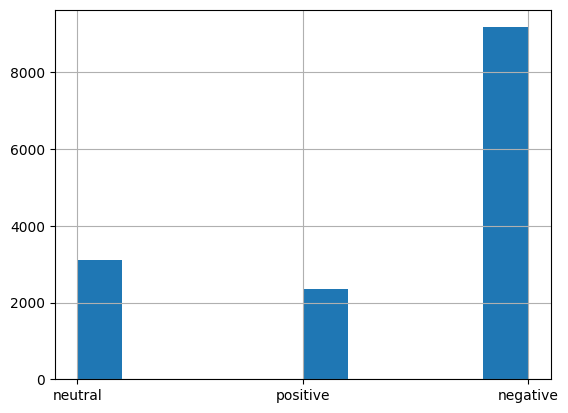

In [12]:
df['airline_sentiment'].hist()

In [13]:
mapping_dict={'positive':1,'negative':-1,'neutral':0}  #we are mapping every sentiment to a specific number
df['target']=df['airline_sentiment'].map(mapping_dict)


In [14]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,0
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,0
3,negative,@VirginAmerica it's really aggressive to blast...,-1
4,negative,@VirginAmerica and it's a really big bad thing...,-1


In [15]:
df_train, df_test = train_test_split(df)

In [16]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,-1
1989,negative,@united The engineer that designed the 787 doo...,-1
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",-1
1711,negative,@united ouch not fair,-1
11542,negative,@USAirways stuck in cae need reFlight Booking ...,-1


In [17]:
vectorizer=TfidfVectorizer(max_features=2000)

In [20]:
X_train=vectorizer.fit_transform(df_train['text'])

In [21]:
X_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157852 stored elements in Compressed Sparse Row format>

In [25]:
X_test=vectorizer.transform(df_test['text'])

In [26]:
Y_train=df_train['target']
Y_test=df_test['target']

In [27]:
model=LogisticRegression(max_iter=500)
model.fit(X_train,Y_train)
print('Train accuracy:',model.score(X_train,Y_train))
print('Test accuracy:',model.score(X_test,Y_test))

Train accuracy: 0.854735883424408
Test accuracy: 0.7991803278688525


In [31]:
Pr_train = model.predict_proba(X_train)#[:, 1]# returns n*2 matrix
Pr_test = model.predict_proba(X_test)#[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))#multiclass model from binary model ovo :one vs one as opposed to one vs rest
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.943098154920424
Test AUC: 0.8953991523105125


In [32]:
type(Pr_train)

numpy.ndarray

In [33]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [34]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.96486133, 0.02700741, 0.00813126],
       [0.30193548, 0.64645161, 0.0516129 ],
       [0.19966063, 0.10067873, 0.69966063]])

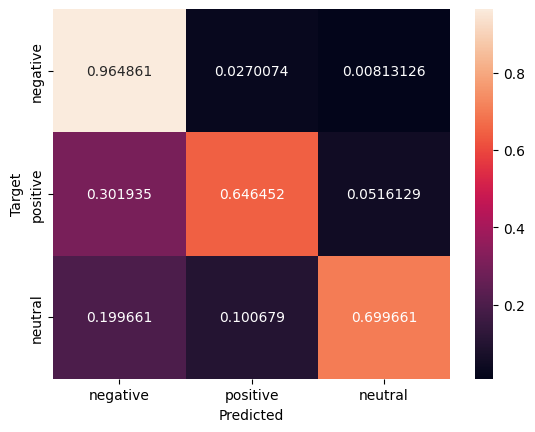

In [35]:
def plot_cm(cm):
  classes = ['negative', 'positive', 'neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

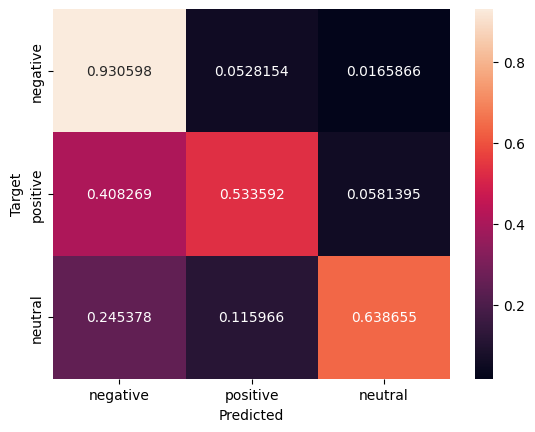

In [36]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

In [37]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'united': 1844,
 'change': 346,
 'made': 1087,
 'in': 929,
 'just': 983,
 'over': 1269,
 'hours': 897,
 'for': 749,
 'something': 1622,
 'that': 1732,
 'should': 1578,
 'have': 845,
 'taken': 1706,
 'seconds': 1545,
 'online': 1245,
 'am': 138,
 'not': 1212,
 'loved': 1076,
 'the': 1734,
 'agent': 109,
 'though': 1750,
 'door': 563,
 'to': 1770,
 'half': 826,
 'into': 953,
 'plane': 1332,
 'seat': 1539,
 'be': 245,
 'forced': 750,
 'always': 137,
 'sit': 1594,
 'here': 868,
 'americanair': 142,
 '11': 5,
 'out': 1264,
 'of': 1226,
 'delayed': 498,
 'flights': 730,
 'you': 1994,
 'suck': 1677,
 'and': 148,
 'getting': 795,
 'worse': 1970,
 'fair': 665,
 'usairways': 1863,
 'stuck': 1672,
 'need': 1191,
 'reflight': 1436,
 'booking': 276,
 'problems': 1379,
 'next': 1199,
 'flight': 719,
 'possibly': 1359,
 'dm': 550,
 'more': 1169,
 'info': 941,
 '30': 36,
 'departure': 513,
 'sure': 1691,
 'is': 957,
 'there': 1738,
 'catering': 332,
 'at': 197,
 'jfk': 976,
 'http': 905,
 'co': 386,


In [70]:
# let's look at the weights for each word
# try it with different threshold values!
threshold = 2

print("Most positive words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
hours 2.9888170592359864
not 3.2502483902639745
delayed 2.855148365314425
stuck 2.2825208765044223
hour 2.0773564005771568
cancelled 2.6535763676613286
delay 2.450467848703869
nothing 2.177941059547964
no 3.463124509112859
worst 3.225286980732197
hold 2.545492136071265
why 2.3854109629947464
luggage 2.2837248467254505
doesn 2.125287494218712
lost 2.1146964184680734


In [71]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
southwestair -2.352456097059959
thank -4.370802758477884
thanks -3.982021140910619
great -2.1291614267102235
virginamerica -2.6135415040764753
jetblue -2.504494344336134
love -2.553816239545594
amazing -2.42762730083913
worries -2.169244687786648


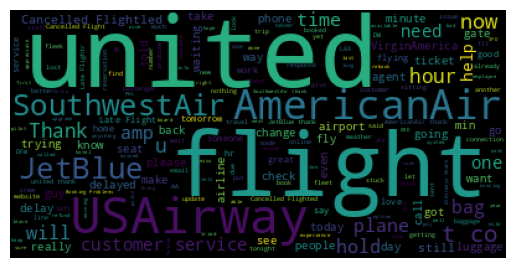

In [89]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

texts = ' '.join(word for word in df.text)

# # Create and generate a word cloud image:
wordcloud = WordCloud().generate(texts)

# # Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [80]:
# visualize the data
def visualize(label):
  words = ''
  for msg in df[df['airline_sentiment'] == label]['text']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

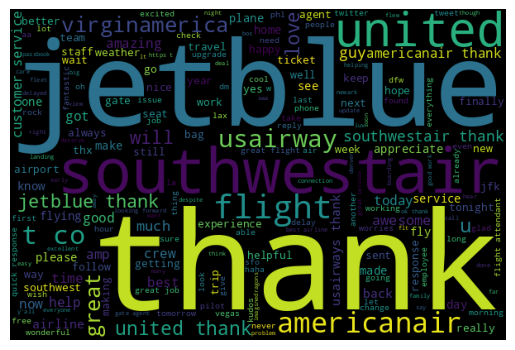

In [81]:
visualize('positive')

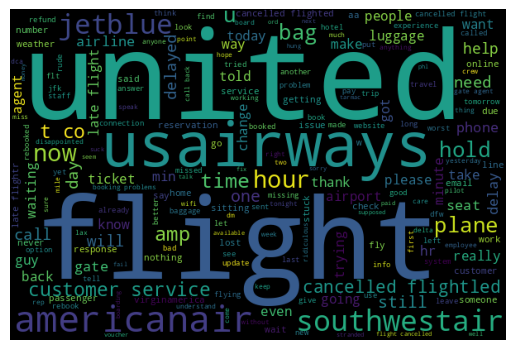

In [90]:
visualize('negative')